# 1-3 標準偏差が持つルール、68–95–99.7則
ここでは標準偏差$\sigma$が持っている68–95–99.7則と呼ばれる性質を学ぶことを目的とする。

>標準偏差には学校の確率の勉強の時には学ばない性質があります。この性質はとても便利で、統計の正確性の基準として使われることもあります。この章ではその便利な性質を理解し、実際に統計を取るときに活用していきましょう。

### (Ⅰ)68–95–99.7則とはなにか
68–95–99.7則は正規分布に従うグラフであるとき、平均$\pm\sigma$に含まれるデータは全体の68％、平均$\pm2\sigma$に含まれるデータは全体の95％、平均$\pm3\sigma$に含まれるデータは全体の99.7％を占めるという法則である。品質管理などの分野では「3$\sigma$のルール」と呼ばれることもある。

### (Ⅱ)68–95–99.7則の成立確認
### ①68則の確認

データ量の関係より今回はcsvファイルを使用して、説明を行う。同じワークスペースにdataフォルダを作り、そこにcsvファイルを置いて読み取る。今回は500人の生徒の数学のテストの結果を模したcsvファイルを作成した。
初めにcsvファイルの読み込みが出来ているかを確認する。

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
#csvファイルの読み込みを行う。
df = pd.read_csv('data/suugaku.csv',
                 index_col='生徒番号')
#１0人分の数学のデータを使う
scores = np.array(df['数学'])[:10]

In [3]:
#それぞれのデータに名前を付ける
scores_df = pd.DataFrame({'点数':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='生徒'))
scores_df

,点数
生徒,
A,53
B,54
C,48
D,50
E,28
F,58
G,48
H,73
I,46


csvファイルが読み込めていることを確認できた。

次にデータが正規分布に従っているかを確認する。何故なら68則が成り立つためにはデータが正規分布に準じている必要があるからである。
正規分布に準じているかどうかはヒストグラムを見ることで判断が可能であるため、ヒストグラムを作成し、データのばらつきを見てみる。

In [4]:
# 500人分の数学の点数のarray
math_scores = np.array(df['数学'])
# Seriesに変換してdescribeを表示、ここで小数点2ケタにするためにprecisionを2に設定している。
pd.set_option('precision', 2)
pd.Series(math_scores).describe()

count    500.00
mean      49.16
std       14.33
min        2.00
25%       39.00
50%       49.00
75%       58.00
max       88.00
dtype: float64

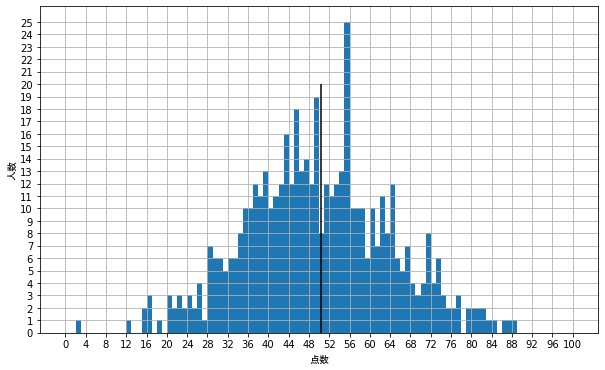

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(math_scores, bins=100, range=(0, 100))
#平均値が分かりやすいよう黒い線を平均値にいれる
ax.vlines(np.mean(scores),0,20,'black')

ax.set_xlabel('点数', fontname="MS Gothic")
ax.set_ylabel('人数', fontname="MS Gothic")
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.grid()
plt.show()

グラフより、このデータはおおよそ正規分布に従っていることが分かる。
次に平均$\pm\sigma$に含まれるデータが全体の何％を占めているかを計算する。
全500個のデータ中、平均$\pm\sigma$に含まれるデータ数がいくつあるか計算し、その割合を求める。

In [6]:
# データ数、数値の確認
print(df)

      数学
生徒番号    
1     53
2     54
3     48
4     50
5     28
...   ..
496   72
497   31
498   66
499   50
500   36

[500 rows x 1 columns]


In [20]:
# データ数、数値の確認　はじかれている数があることが分かる
ave1 = df[(df['数学'] < 49.16 + 14.33) & (df['数学'] > 49.16 - 14.33)]
print('68則\n',ave1)

68則
       数学
生徒番号    
1     53
2     54
3     48
4     50
6     58
...   ..
492   37
494   37
495   49
499   50
500   36

[346 rows x 1 columns]


In [9]:
rule68 = len(ave1) / len(df) * 100
print(round(rule68,2),'%')

69.2 %


### ②68則が成り立っているかの結果
よってこのデータは正規分布に準じていて、平均$\pm\sigma$に含まれるデータが全体の69.2％を占めているということが分かった。
グラフよりこのデータは綺麗な正規分布ではないためある程度の誤差はあると考えられる。そのため68％ルールがこのデータにおいて成り立っているだろうと推測できる。

### ③95–99.7則の成立確認
同じ方法で95–99.7則が成立しているかも確認する。誤差が大きくなるのか小さくなるのかにも着目しながら行う。

In [10]:
ave2 = df[(df['数学'] < 49.16 + 2*14.33) & (df['数学'] > 49.16 - 2*14.33)]
print('95則\n',ave2)
rule95 = len(ave2) / len(df) * 100
print(round(rule95,2),'%')

95則
       数学
生徒番号    
1     53
2     54
3     48
4     50
5     28
...   ..
496   72
497   31
498   66
499   50
500   36

[476 rows x 1 columns]
95.2 %


In [11]:
ave3 = df[(df['数学'] < 49.16 + 3*14.33) & (df['数学'] > 49.16 - 3*14.33)]
print('99.7則\n',ave3)
rule997 = len(ave3) / len(df) * 100
print(round(rule997,2),'%')

99.7則
       数学
生徒番号    
1     53
2     54
3     48
4     50
5     28
...   ..
496   72
497   31
498   66
499   50
500   36

[499 rows x 1 columns]
99.8 %


### ④95–99.7則が成り立っているかの結果
こちらは68則の時と比べより正確に95–99.7%に近づいている。よって95–99.7則が成り立っていることが確認できるとともにグラフが正規分布であるか評価するのにも役立っていることが分かる。

### (Ⅱ)結論
正規分布に従うデータでは、このルールによってある程度正確性を持つ予測を立てる事が可能になっている。
またこの数値の差から母数データがどれくらい正規分布に従っているかを評価することも出来る。
68–95–99.7則はデータを扱う上で非常に便利な性質を持っている事が分かった。

前 → [1-2 分散・標準偏差.ipynb](https://github.com/IT-1009/statistics/blob/main/1-2%20%E5%88%86%E6%95%A3%E3%83%BB%E6%A8%99%E6%BA%96%E5%81%8F%E5%B7%AE.ipynb)